In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Fichiers de données

In [2]:
file_energy = "Datasets/Tetuan_City_power_consumption.csv"
file_revenus = 'Datasets/Month_Value_1.csv'

### Chargement des données

In [3]:
df_revenus = pd.read_csv(file_revenus)
df_energy = pd.read_csv(file_energy)

In [4]:
df_revenus.head(5)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [5]:
df_energy.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### Convertir la colonne des dates en indice 

In [6]:
# Formatage de la colonne des moments d'échantillonnage
df_revenus['Period'] = pd.to_datetime(df_revenus.Period, format="%d.%m.%Y")
df_revenus.index = df_revenus['Period']

df_energy = pd.read_csv(file_energy)
df_energy['DateTime'] = pd.to_datetime(df_energy['DateTime'])
df_energy.index = df_energy['DateTime']

In [7]:
df_energy.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### Visualisation des données

array([<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
       <Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
       <Axes: xlabel='Period'>], dtype=object)

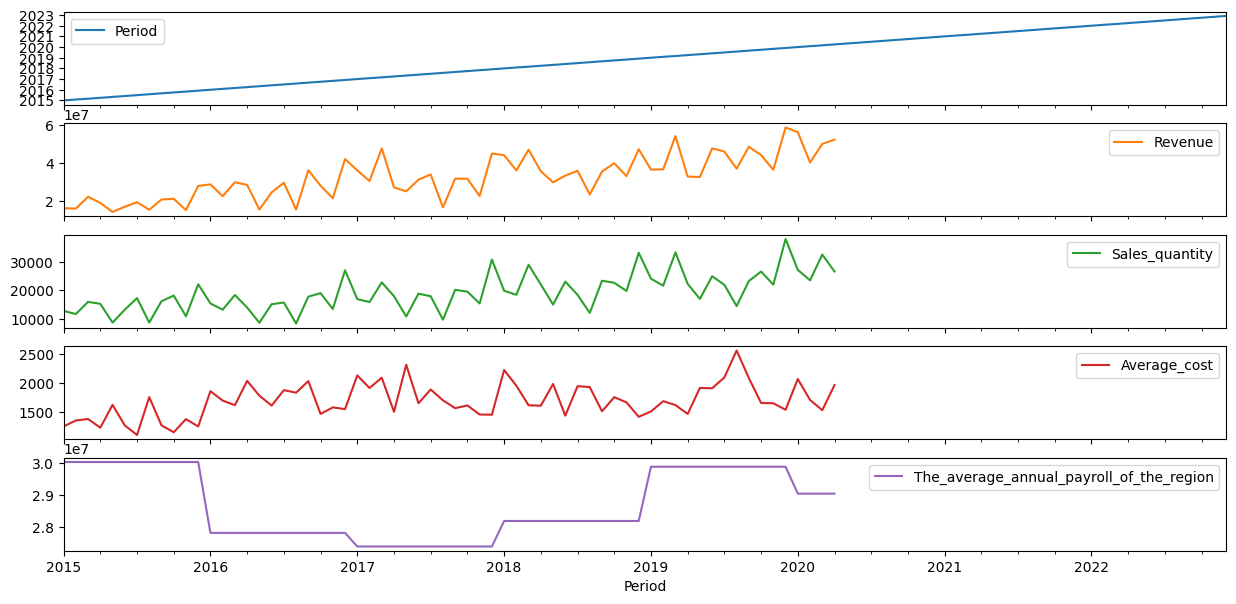

In [8]:
df_revenus.plot(subplots=True, figsize=(15, 7))

array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>], dtype=object)

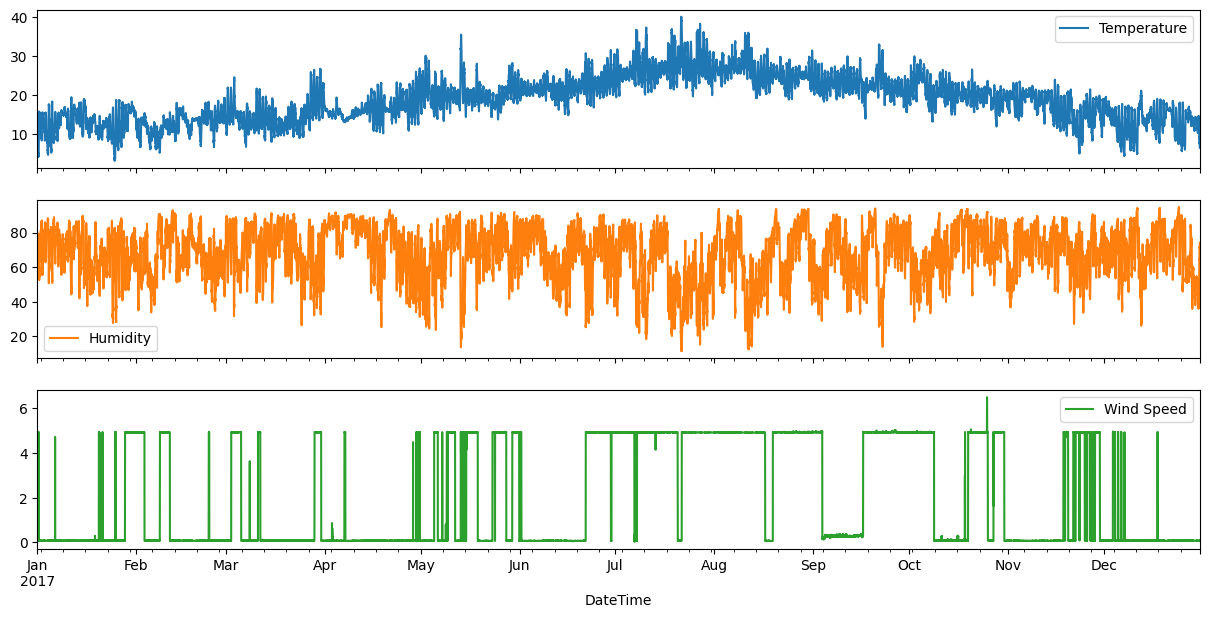

In [9]:
df_energy[['Temperature', 'Humidity', 'Wind Speed']].plot(subplots=True, figsize=(15, 7))

#### Visualisation des données sur une période donnée

Text(0, 0.5, 'Vitesse du vent (Km/h)')

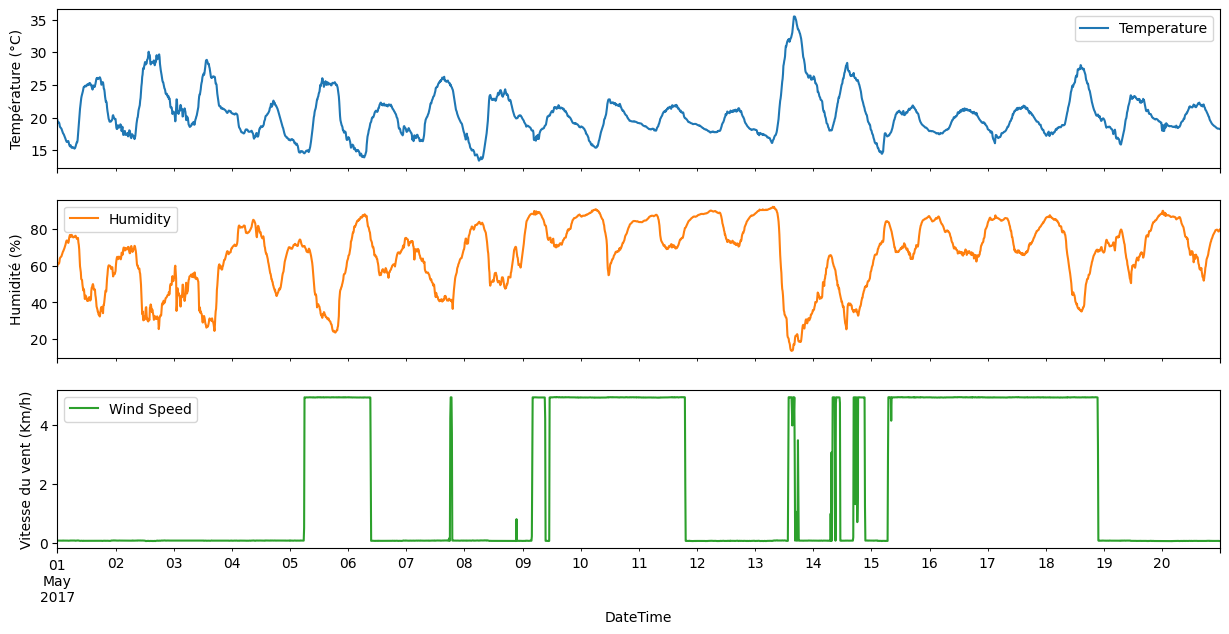

In [10]:
ax_multiplot = df_energy.loc["2017-05-01":"2017-05-20", ['Temperature', 'Humidity', 'Wind Speed']].plot(subplots=True, 
                                                                                          figsize=(15, 7))
ax_multiplot[0].set_ylabel("Température (°C)")
ax_multiplot[1].set_ylabel("Humidité (%)")
ax_multiplot[2].set_ylabel("Vitesse du vent (Km/h)")

Text(0, 0.5, 'Puissance consommée (KW)')

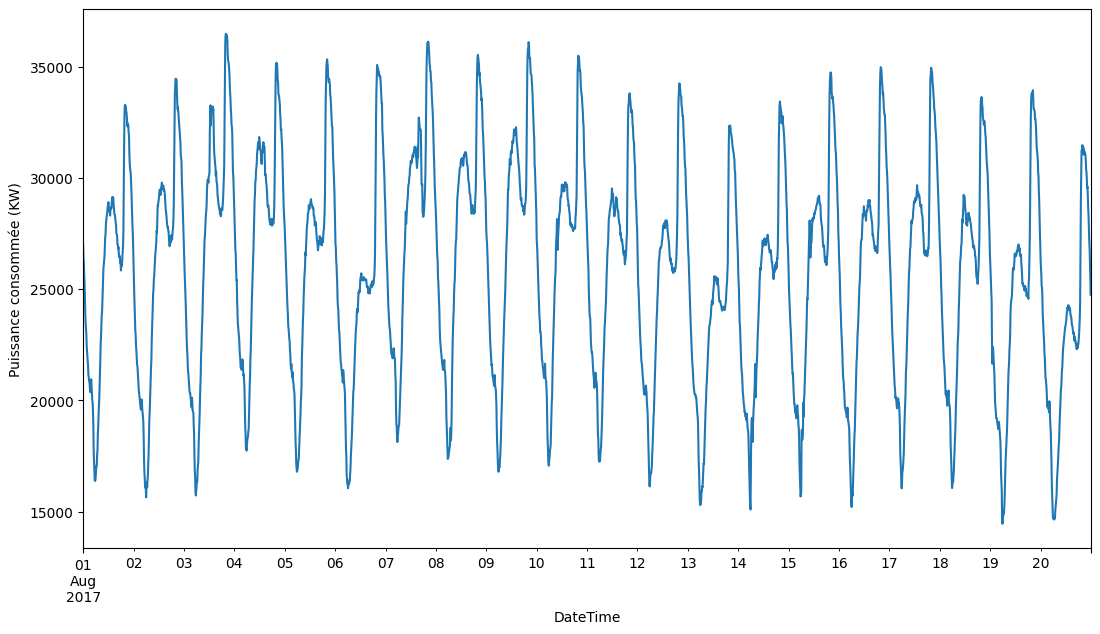

In [11]:
ax_consumption = df_energy.loc["2017-08-01":"2017-08-20", "Zone 2 Power Consumption"].plot(figsize=(13, 7))
ax_consumption.set_ylabel("Puissance consommée (KW)")

#### Analyse de la répartition des données

Text(0.5, 1.0, 'Histogramme de la quantité vendue')

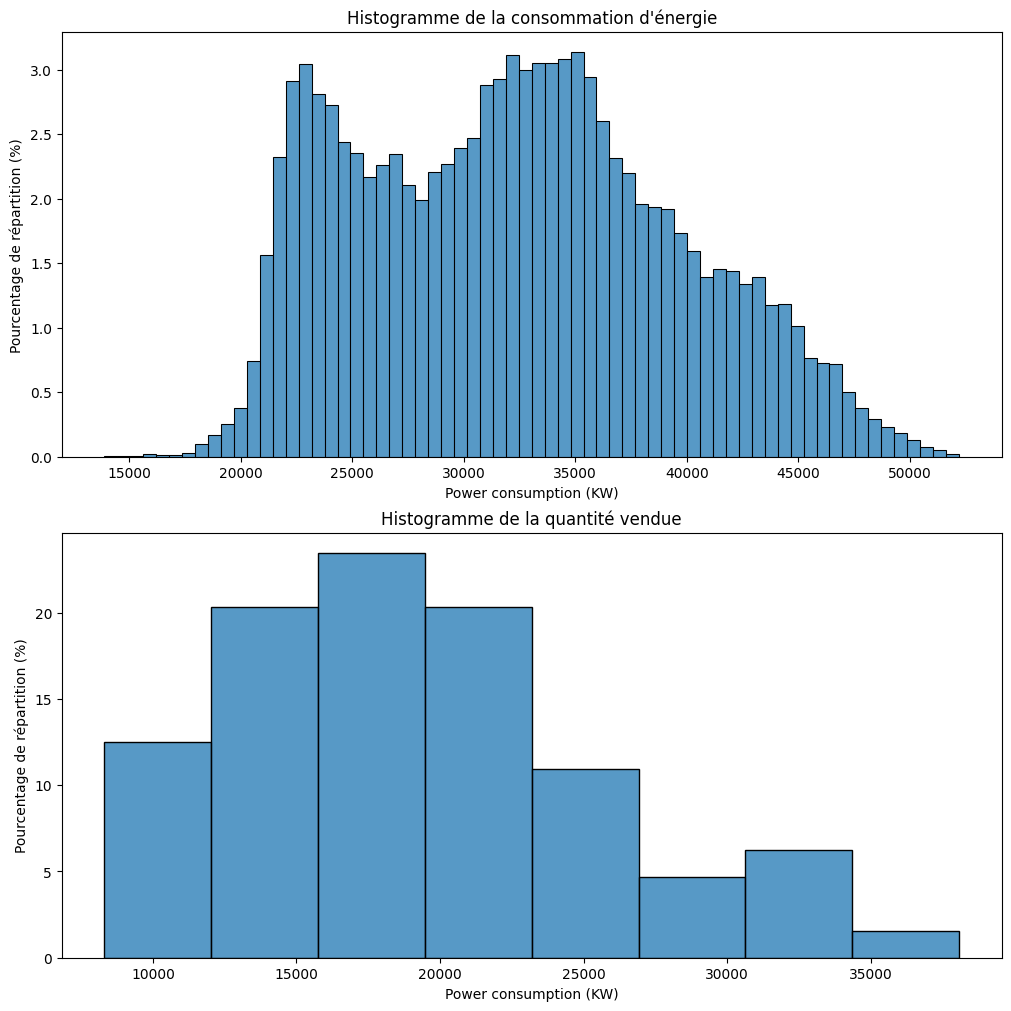

In [12]:
fig, axis = plt.subplots(2,1, figsize=(10,10), constrained_layout=True)
sns.histplot(data=df_energy, x="Zone 1 Power Consumption", stat="percent", ax=axis[0])
sns.histplot(data=df_revenus, x="Sales_quantity", stat="percent", ax=axis[1])

axis[0].set_xlabel('Power consumption (KW)')
axis[0].set_ylabel('Pourcentage de répartition (%)')
axis[0].set_title("Histogramme de la consommation d'énergie")

axis[1].set_xlabel('Power consumption (KW)')
axis[1].set_ylabel('Pourcentage de répartition (%)')
axis[1].set_title("Histogramme de la quantité vendue")

### Analyse de la stationnarité
- Analyse des statistiques
- Test de Dickey-Fuller

In [13]:
print("Base 'Consommation énergétique'")
X=df_energy["Zone 1 Power Consumption"]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

Base 'Consommation énergétique'
mean1=31896.59, mean2=32793.35
variance1=49974290.00, variance2=51315382.92


In [14]:
# Supprimer les valeurs invalids
X.dropna(inplace=True)
result = adfuller(X)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.3f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -32.121
p-value: 0.000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [15]:
print("Base 'Ventes'")
X = df_revenus["Sales_quantity"]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

Base 'Ventes'
mean1=17275.12, mean2=24964.12
variance1=31905952.62, variance2=35200722.65


In [16]:
# Supprimer les valeurs invalids
X.dropna(inplace=True)
result = adfuller(X)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.3f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.157
p-value: 0.996
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597


### Decomposition en saisonnalité et tendace

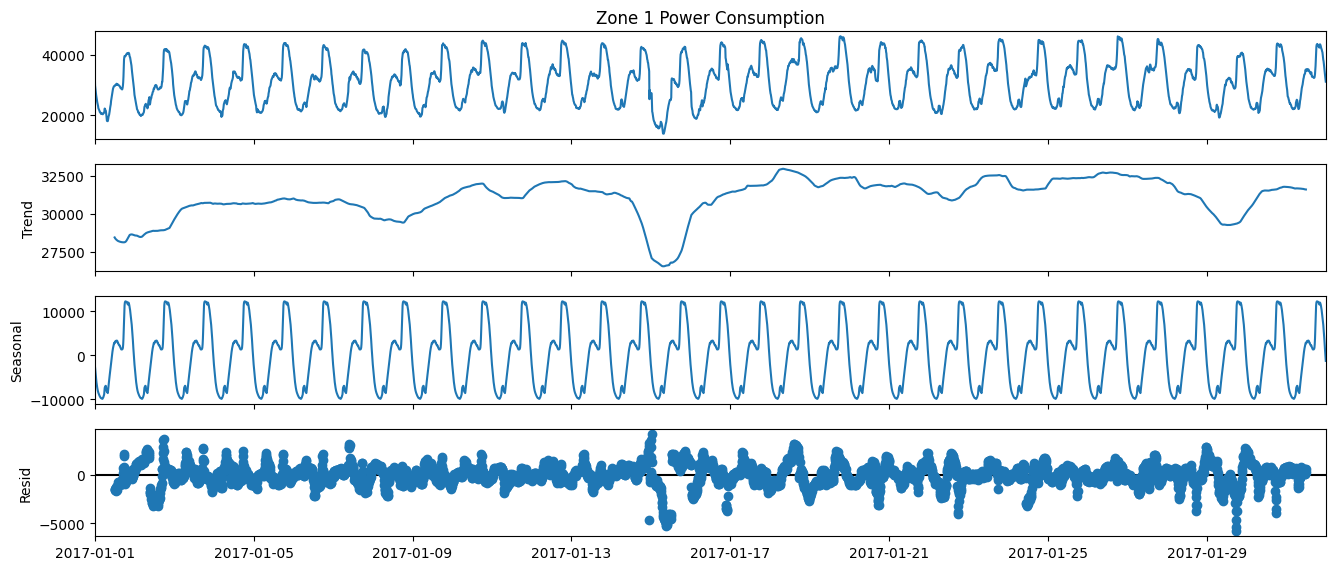

In [17]:
decomposition = seasonal_decompose(df_energy.loc["2017-01", "Zone 1 Power Consumption"], period=6*24)

fig=decomposition.plot()
fig.set_size_inches((15, 6))

### Autocorrélation 

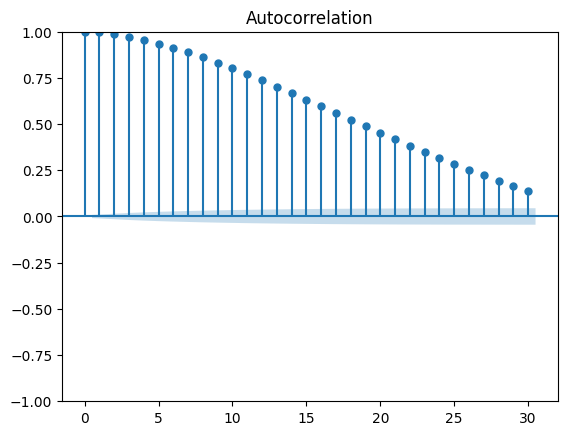

In [18]:
from statsmodels.graphics import tsaplots

#plot autocorrelation function
fig = tsaplots.plot_acf(df_energy["Zone 1 Power Consumption"], lags=30)
plt.show()

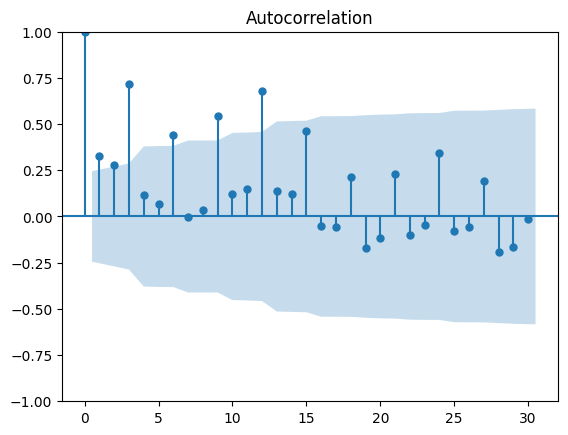

In [19]:
from statsmodels.graphics import tsaplots

#plot autocorrelation function
df_features = df_revenus[['Sales_quantity']].copy()
df_features.dropna(inplace=True)
fig = tsaplots.plot_acf(df_features, lags=30)
plt.show()